In [475]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

Load Dataset & Inspect Data

In [476]:
df = pd.read_csv('Retail_Transactions_2000.csv')
df.head()

,TransactionID,CustomerID,Gender,Age,City,ProductCategory,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount
0,T00001,C2824,Female,33,Bengaluru,Fashion,3,4479,2023-03-15,Cash,13437
1,T00002,C1409,Other,20,Pune,Books,5,1051,2023-01-22,Card,5255
2,T00003,C5506,Other,47,Pune,Furniture,1,111,2023-04-18,Wallet,111
3,T00004,C5012,Other,21,Hyderabad,Groceries,5,2946,2023-08-09,Cash,14730
4,T00005,C4657,Female,41,Chennai,Sports,1,3123,2023-09-23,Wallet,3123


In [477]:
df.shape

(2000, 11)

In [478]:
df.columns.tolist()

['TransactionID',
 'CustomerID',
 'Gender',
 'Age',
 'City',
 'ProductCategory',
 'Quantity',
 'Price',
 'PurchaseDate',
 'PaymentMode',
 'TotalAmount']

In [479]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   TransactionID    2000 non-null   object
 1   CustomerID       2000 non-null   object
 2   Gender           2000 non-null   object
 3   Age              2000 non-null   int64 
 4   City             2000 non-null   object
 5   ProductCategory  2000 non-null   object
 6   Quantity         2000 non-null   int64 
 7   Price            2000 non-null   int64 
 8   PurchaseDate     2000 non-null   object
 9   PaymentMode      2000 non-null   object
 10  TotalAmount      2000 non-null   int64 
dtypes: int64(4), object(7)
memory usage: 172.0+ KB


In [480]:
df.isnull().sum()

TransactionID      0
CustomerID         0
Gender             0
Age                0
City               0
ProductCategory    0
Quantity           0
Price              0
PurchaseDate       0
PaymentMode        0
TotalAmount        0
dtype: int64

In [481]:
df.duplicated().sum()

np.int64(0)

In [482]:
print("Unique values in Gender:", df['Gender'].unique(),"\n")
print("Unique values in City:", df['City'].unique(),"\n")
print("Unique values in ProductCategory:", df['ProductCategory'].unique(),"\n")
print("Unique values in PaymentMode:", df['PaymentMode'].unique(),"\n")

Unique values in Gender: ['Female' 'Other' 'Male'] 

Unique values in City: ['Bengaluru' 'Pune' 'Hyderabad' 'Chennai' 'Delhi' 'Jaipur' 'Lucknow'
 'Ahmedabad' 'Kolkata' 'Mumbai'] 

Unique values in ProductCategory: ['Fashion' 'Books' 'Furniture' 'Groceries' 'Sports' 'Electronics' 'Beauty'] 

Unique values in PaymentMode: ['Cash' 'Card' 'Wallet' 'UPI'] 



Data Cleaning

In [483]:
df['Gender'] = df['Gender'].str.strip().str.capitalize()

In [484]:
df = df[(df['Quantity'] > 0) & (df['Price'] > 0)]

Feature Engineering

In [485]:
df['TotalAmount'] = df['Quantity'] * df['Price']

In [486]:
df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'], errors='coerce')
df['PurchaseMonth'] = df['PurchaseDate'].dt.month
df['PurchaseDayOfWeek'] = df['PurchaseDate'].dt.day_name()

In [487]:
bins = [0, 25, 40, 60, 120]
labels = ['18-25', '26-40', '41-60', '60+']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)

In [488]:
df['AgeGroup'].value_counts()

AgeGroup
41-60    791
26-40    546
60+      387
18-25    276
Name: count, dtype: int64

In [489]:
df['City'].value_counts()

City
Ahmedabad    222
Bengaluru    217
Lucknow      213
Mumbai       202
Delhi        199
Jaipur       196
Kolkata      196
Chennai      187
Hyderabad    185
Pune         183
Name: count, dtype: int64

Encoding Categorical Variables

In [490]:
le_cols = ['Gender']
le = LabelEncoder()
for col in le_cols:
    df[col] = le.fit_transform(df[col].astype(str))

In [491]:
ohe_cols = ['City', 'ProductCategory']
df = pd.get_dummies(df, columns=ohe_cols, drop_first=True)

Skew Check and Log Transformation

In [492]:
num_cols = ['Age', 'Price', 'Quantity', 'TotalAmount']
skew = df[num_cols].skew()
print(skew)

Age           -0.074184
Price          0.041682
Quantity       0.038835
TotalAmount    0.908799
dtype: float64


In [493]:
df['TotalAmount'] = np.log1p(df['TotalAmount'])
print("Skew after log:", df['TotalAmount'].skew())

Skew after log: -0.7190205114457007


In [494]:
num_cols = ['Age', 'Price', 'Quantity', 'TotalAmount']
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [495]:
print("Missing values per column:\n", df.isnull().sum())
print("Final dataset shape:", df.shape)

Missing values per column:
 TransactionID                  0
CustomerID                     0
Gender                         0
Age                            0
Quantity                       0
Price                          0
PurchaseDate                   0
PaymentMode                    0
TotalAmount                    0
PurchaseMonth                  0
PurchaseDayOfWeek              0
AgeGroup                       0
City_Bengaluru                 0
City_Chennai                   0
City_Delhi                     0
City_Hyderabad                 0
City_Jaipur                    0
City_Kolkata                   0
City_Lucknow                   0
City_Mumbai                    0
City_Pune                      0
ProductCategory_Books          0
ProductCategory_Electronics    0
ProductCategory_Fashion        0
ProductCategory_Furniture      0
ProductCategory_Groceries      0
ProductCategory_Sports         0
dtype: int64
Final dataset shape: (2000, 27)


Save Cleaned Dataset

In [496]:
df.to_csv("Retail_Cleaned.csv", index=False)
print("✅ Cleaned dataset saved as Retail_Cleaned.csv")

✅ Cleaned dataset saved as Retail_Cleaned.csv


Data Visualization

Load Cleaned Dataset

In [497]:
df_cleaned = pd.read_csv("Retail_Cleaned.csv")
df.head()

,TransactionID,CustomerID,Gender,Age,Quantity,Price,PurchaseDate,PaymentMode,TotalAmount,PurchaseMonth,...,City_Kolkata,City_Lucknow,City_Mumbai,City_Pune,ProductCategory_Books,ProductCategory_Electronics,ProductCategory_Fashion,ProductCategory_Furniture,ProductCategory_Groceries,ProductCategory_Sports
0,T00001,C2824,0,0.288462,0.5,0.893673,2023-03-15,Cash,0.885533,3,...,False,False,False,False,False,False,True,False,False,False
1,T00002,C1409,2,0.038462,1.0,0.194082,2023-01-22,Card,0.711895,1,...,False,False,False,True,True,False,False,False,False,False
2,T00003,C5506,2,0.557692,0.0,0.002245,2023-04-18,Wallet,0.000000,4,...,False,False,False,True,False,False,False,True,False,False
3,T00004,C5012,2,0.057692,1.0,0.580816,2023-08-09,Cash,0.902526,8,...,False,False,False,False,False,False,False,False,True,False
4,T00005,C4657,0,0.442308,0.0,0.616939,2023-09-23,Wallet,0.615661,9,...,False,False,False,False,False,False,False,False,False,True


Customer Demographics

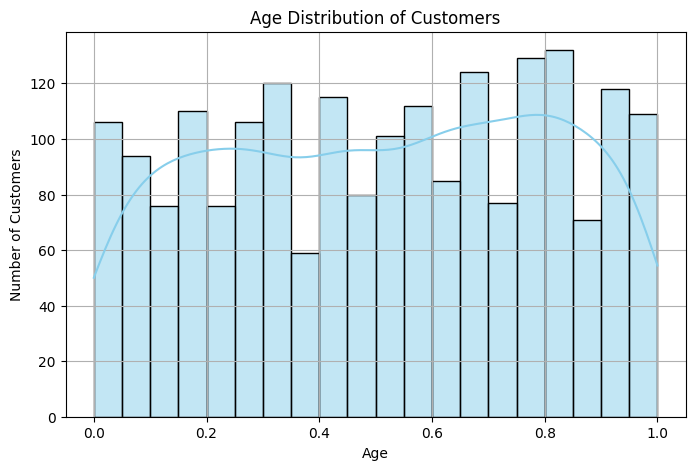

In [498]:
plt.figure(figsize=(8,5))
sns.histplot(df_cleaned['Age'], bins=20, kde=True, color='skyblue')
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.grid(True)
plt.show()

Gender
1    673
0    664
2    663
Name: count, dtype: int64


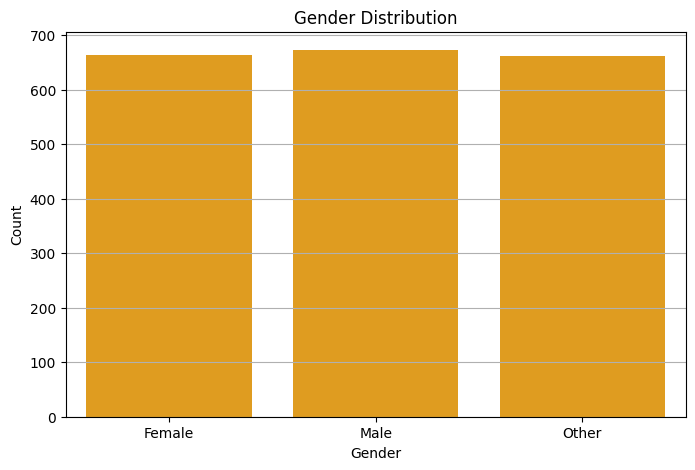

In [499]:
print(df['Gender'].value_counts())

plt.figure(figsize=(8,5))
sns.countplot(x='Gender', data=df_cleaned, color='orange')
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(ticks=[0,1,2], labels=['Female', 'Male', 'Other'])
plt.grid(axis='y')
plt.show()

City
Bengaluru    439
Lucknow      213
Mumbai       202
Delhi        199
Jaipur       196
Kolkata      196
Chennai      187
Hyderabad    185
Pune         183
Name: count, dtype: int64


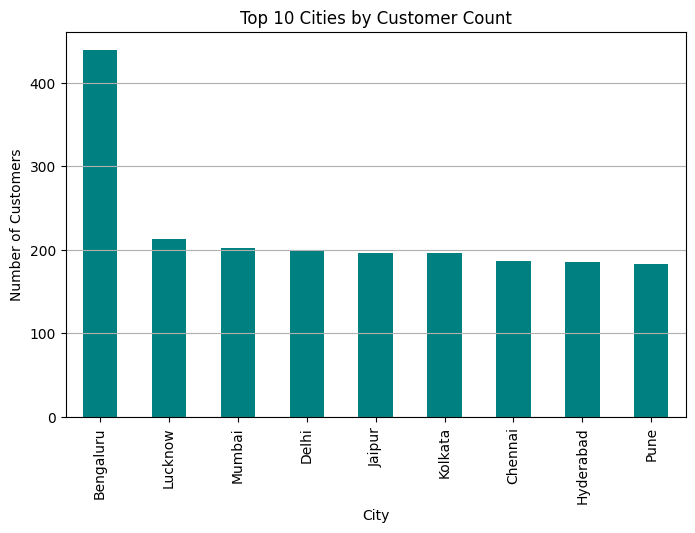

In [500]:
city_cols = [col for col in df_cleaned.columns if 'City_' in col]
df_cleaned['City'] = df_cleaned[city_cols].idxmax(axis=1).str.replace('City_','')
top_cities = df_cleaned['City'].value_counts().head(10)
print(top_cities)

plt.figure(figsize=(8,5))
top_cities.plot(kind='bar', color='teal')
plt.title("Top 10 Cities by Customer Count")
plt.xlabel("City")
plt.ylabel("Number of Customers")
plt.grid(axis='y')
plt.show()

Sales Insights

ProductCategory
Books          422.969027
Electronics    197.098277
Fashion        180.477739
Furniture      220.823483
Groceries      195.927774
Sports         186.240876
Name: TotalAmount, dtype: float64


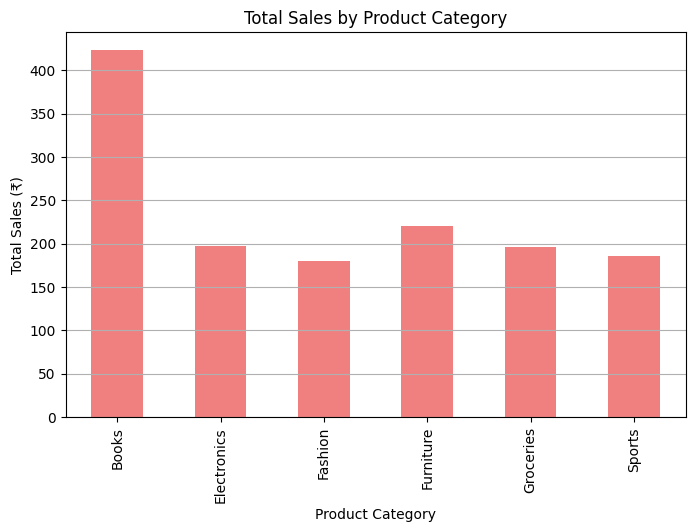

In [501]:
product_cols = [col for col in df_cleaned.columns if 'ProductCategory_' in col]
df_cleaned['ProductCategory'] = df_cleaned[product_cols].idxmax(axis=1).str.replace('ProductCategory_','')
sales_by_category = df_cleaned.groupby('ProductCategory')['TotalAmount'].sum()
print(sales_by_category)

plt.figure(figsize=(8,5))
sales_by_category.plot(kind='bar', color='lightcoral')
plt.title("Total Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales (₹)")
plt.grid(axis='y')
plt.show()

PurchaseMonth
1     110.819143
2      98.798899
3     120.401420
4     125.541788
5     119.454359
6     128.846084
7     119.902484
8     132.363611
9     114.919993
10    110.249180
11    117.749584
12    104.490633
Name: TotalAmount, dtype: float64


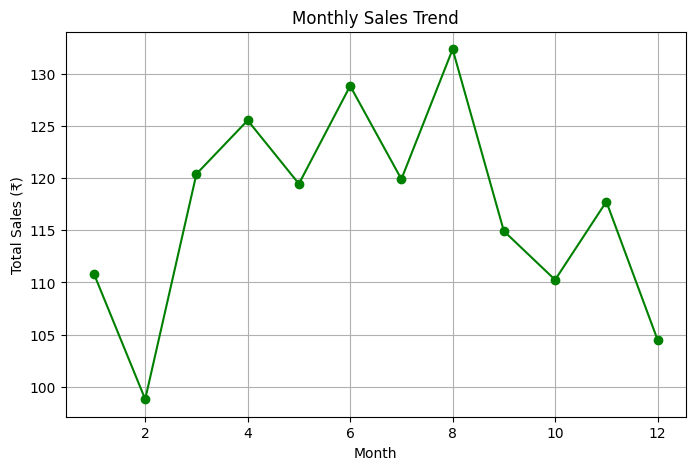

In [502]:
monthly_sales = df_cleaned.groupby('PurchaseMonth')['TotalAmount'].sum()
print(monthly_sales)

plt.figure(figsize=(8,5))
monthly_sales.plot(kind='line', marker='o', color='green')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales (₹)")
plt.grid(True)
plt.show()

PaymentMode
Card      520
Wallet    519
UPI       484
Cash      477
Name: count, dtype: int64


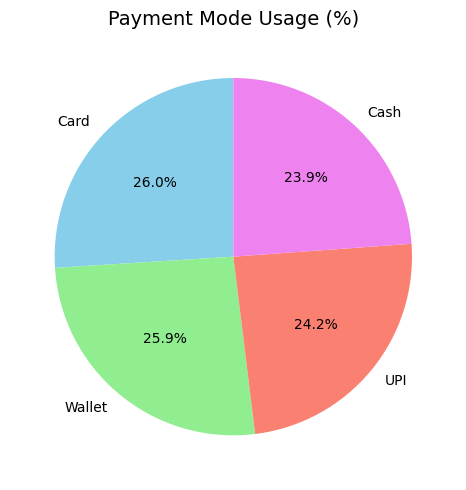

In [503]:
payment_counts = df_cleaned['PaymentMode'].value_counts()
print(payment_counts)

plt.figure(figsize=(5,5))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'salmon', 'violet'])
plt.title("Payment Mode Usage (%)", fontsize=14)
plt.tight_layout()
plt.show()

 Advanced Insights

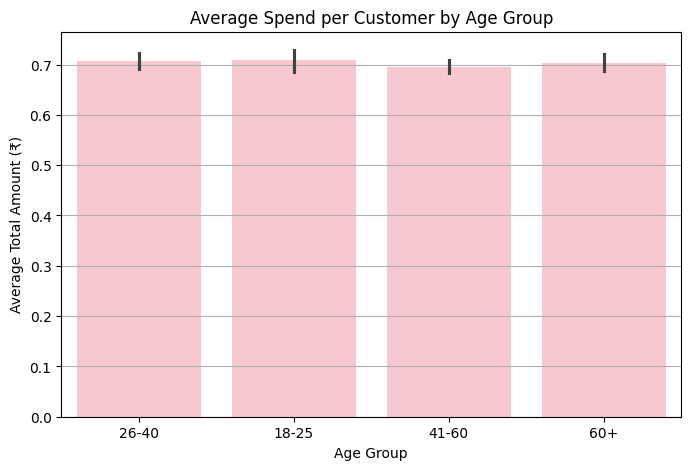

In [504]:
plt.figure(figsize=(8,5))
sns.barplot(x='AgeGroup', y='TotalAmount', data=df_cleaned, color='pink')
plt.title("Average Spend per Customer by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Total Amount (₹)")
plt.grid(axis='y')
plt.show()

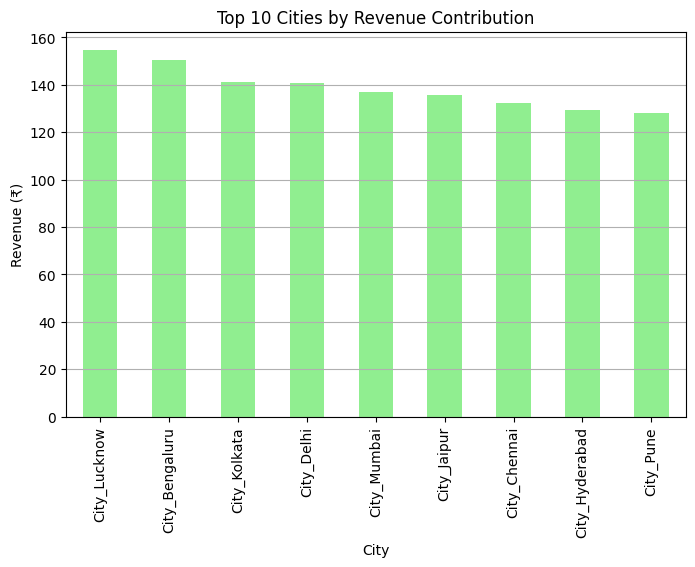

In [505]:
city_revenue = df_cleaned[city_cols].mul(df_cleaned['TotalAmount'], axis=0).sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(8,5))
city_revenue.plot(kind='bar', color='lightgreen')
plt.title("Top 10 Cities by Revenue Contribution")
plt.xlabel("City")
plt.ylabel("Revenue (₹)")
plt.grid(axis='y')
plt.show()

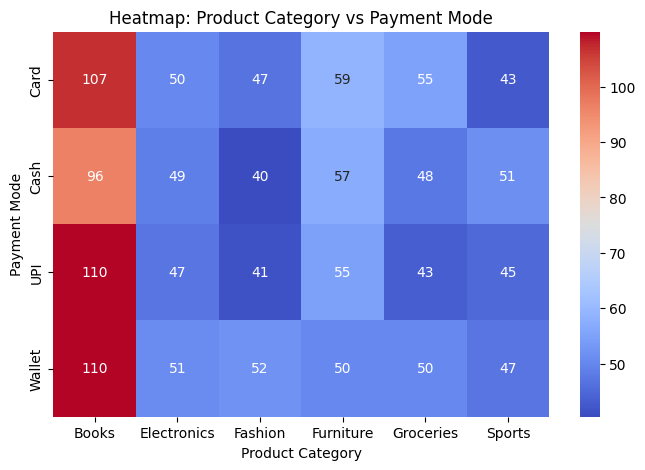

In [506]:
heat_data = pd.pivot_table(df_cleaned, values='TotalAmount', index='PaymentMode', columns='ProductCategory', aggfunc='sum')

plt.figure(figsize=(8,5))
sns.heatmap(heat_data, annot=True, fmt=".0f", cmap='coolwarm')
plt.title("Heatmap: Product Category vs Payment Mode")
plt.xlabel("Product Category")
plt.ylabel("Payment Mode")
plt.show()